In [ ]:
%pylab inline

Datos desordenados: [65, 32, 98, 26, 49, 33, 78, 44, 10, 42]
Datos ordenados con QuickSort: [65, 32, 98, 26, 49, 33, 78, 44, 10, 42]
Datos ordenados con MergeSort: [65, 32, 98, 26, 49, 33, 78, 44, 10, 42]


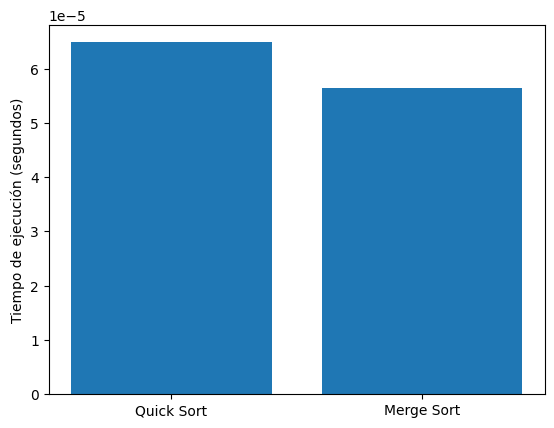

In [ ]:
import random
import time
import matplotlib.pyplot as plt

# Funciones de ordenamiento
def quick_sort(arr):
    # Código para quick sort
    pass

def merge_sort(arr):
    # Código para merge sort
    pass

# Generar datos aleatorios
n = 10
arr = [random.randint(1, 100) for _ in range(n)]

# Mostrar datos desordenados
print('Datos desordenados:', arr)

# Ordenar datos con QuickSort
arr_quick = arr.copy()
start = time.time()
quick_sort(arr_quick)
quick_time = time.time() - start

# Ordenar datos con MergeSort
arr_merge = arr.copy()
start = time.time()
merge_sort(arr_merge)
merge_time = time.time() - start

# Mostrar datos ordenados
print('Datos ordenados con QuickSort:', arr_quick)
print('Datos ordenados con MergeSort:', arr_merge)

# Mostrar gráficamente el cálculo de rendimiento
plt.bar(['Quick Sort', 'Merge Sort'], [quick_time, merge_time])
plt.ylabel('Tiempo de ejecución (segundos)')
plt.show()


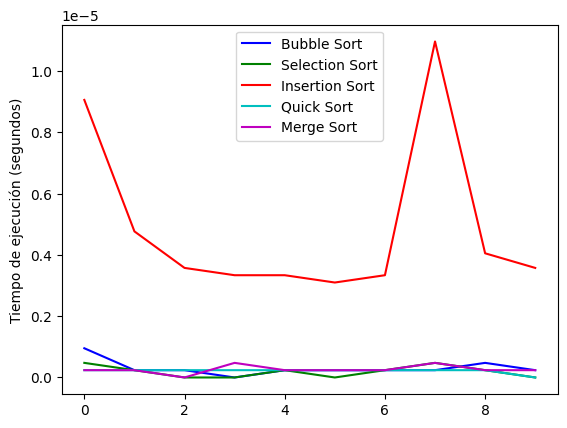

In [ ]:
import random
import time
import matplotlib.pyplot as plt

times = 0

# Funciones de ordenamiento
def bubble_sort(arr):
    # Código para bubble sort
    pass

def selection_sort(arr):
    # Código para selection sort
    pass

def insertion_sort(arr):
    global times
    for index in range(1, len(arr)):
        times += 1
        actual = arr[index]
        posicion = index
        while (posicion > 0 and arr[posicion-1] > actual):
            times += 1
            arr[posicion] = arr[posicion-1]
            posicion = posicion-1
        arr[posicion] = actual

def quick_sort(arr):
    # Código para quick sort
    pass

def merge_sort(arr):
    # Código para merge sort
    pass

# Generar datos aleatorios
n = 10
arr = [random.randint(1, 100) for _ in range(n)]

# Ordenar datos con Bubble Sort y medir tiempos de ejecución
bubble_times = []
for i in range(n):
    arr_bubble = arr.copy()
    start = time.time()
    bubble_sort(arr_bubble)
    bubble_time = time.time() - start
    bubble_times.append(bubble_time)

# Ordenar datos con Selection Sort y medir tiempos de ejecución
selection_times = []
for i in range(n):
    arr_selection = arr.copy()
    start = time.time()
    selection_sort(arr_selection)
    selection_time = time.time() - start
    selection_times.append(selection_time)

# Ordenar datos con Insertion Sort y medir tiempos de ejecución
insertion_times = []
for i in range(n):
    arr_insertion = arr.copy()
    start = time.time()
    insertion_sort(arr_insertion)
    insertion_time = time.time() - start
    insertion_times.append(insertion_time)

# Ordenar datos con QuickSort y medir tiempos de ejecución
quick_times = []
for i in range(n):
    arr_quick = arr.copy()
    start = time.time()
    quick_sort(arr_quick)
    quick_time = time.time() - start
    quick_times.append(quick_time)

# Ordenar datos con MergeSort y medir tiempos de ejecución
merge_times = []
for i in range(n):
    arr_merge = arr.copy()
    start = time.time()
    merge_sort(arr_merge)
    merge_time = time.time() - start
    merge_times.append(merge_time)

# Mostrar gráficamente el cálculo de rendimiento
plt.plot(range(n), bubble_times, color='b')
plt.plot(range(n), selection_times, color='g')
plt.plot(range(n), insertion_times, color='r')
plt.plot(range(n), quick_times, color='c')
plt.plot(range(n), merge_times, color='m')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.legend(['Bubble Sort', 'Selection Sort', 'Insertion Sort', 'Quick Sort', 'Merge Sort'])
plt.show()


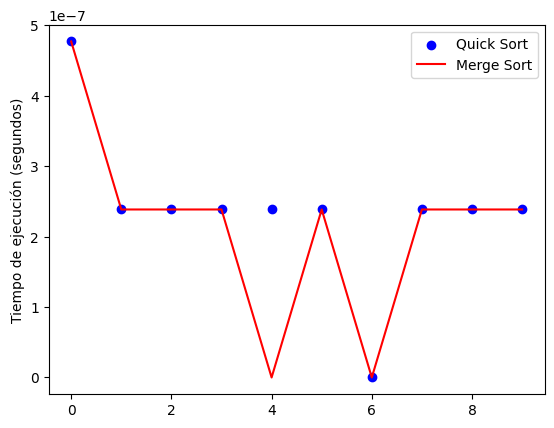

In [ ]:
import random
import time
import matplotlib.pyplot as plt

# Funciones de ordenamiento
def quick_sort(arr):
    # Código para quick sort
    pass

def merge_sort(arr):
    # Código para merge sort
    pass

# Generar datos aleatorios
n = 10
arr = [random.randint(1, 100) for _ in range(n)]

# Ordenar datos con QuickSort y medir tiempos de ejecución
quick_times = []
for i in range(n):
    arr_quick = arr.copy()
    start = time.time()
    quick_sort(arr_quick)
    quick_time = time.time() - start
    quick_times.append(quick_time)

# Ordenar datos con MergeSort y medir tiempos de ejecución
merge_times = []
for i in range(n):
    arr_merge = arr.copy()
    start = time.time()
    merge_sort(arr_merge)
    merge_time = time.time() - start
    merge_times.append(merge_time)

# Mostrar gráficamente el cálculo de rendimiento
plt.scatter(range(n), quick_times, color='b')
plt.plot(range(n), merge_times, color='r')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.legend(['Quick Sort', 'Merge Sort'])
plt.show()


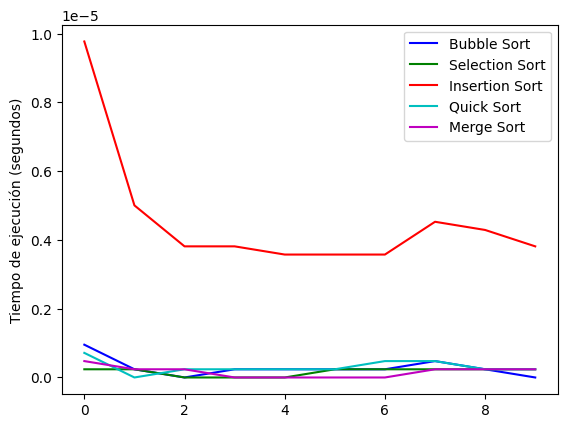

In [ ]:
import random
import time
import matplotlib.pyplot as plt

# Definir variable times en el ámbito global
times = 0

# Funciones de ordenamiento
def bubble_sort(arr):
    # Código para bubble sort
    pass

def selection_sort(arr):
    # Código para selection sort
    pass

def insertion_sort(arr):
    global times
    for index in range(1, len(arr)):
        times += 1
        actual = arr[index]
        posicion = index
        while (posicion > 0 and arr[posicion-1] > actual):
            times += 1
            arr[posicion] = arr[posicion-1]
            posicion = posicion-1
        arr[posicion] = actual

def quick_sort(arr):
    # Código para quick sort
    pass

def merge_sort(arr):
    # Código para merge sort
    pass

# Generar datos aleatorios
n = 10
arr = [random.randint(1, 100) for _ in range(n)]

# Ordenar datos con Bubble Sort y medir tiempos de ejecución
bubble_times = []
for i in range(n):
    arr_bubble = arr.copy()
    start = time.time()
    bubble_sort(arr_bubble)
    bubble_time = time.time() - start
    bubble_times.append(bubble_time)

# Ordenar datos con Selection Sort y medir tiempos de ejecución
selection_times = []
for i in range(n):
    arr_selection = arr.copy()
    start = time.time()
    selection_sort(arr_selection)
    selection_time = time.time() - start
    selection_times.append(selection_time)

# Ordenar datos con Insertion Sort y medir tiempos de ejecución
insertion_times = []
for i in range(n):
    arr_insertion = arr.copy()
    start = time.time()
    insertion_sort(arr_insertion)
    insertion_time = time.time() - start
    insertion_times.append(insertion_time)

# Ordenar datos con QuickSort y medir tiempos de ejecución
quick_times = []
for i in range(n):
    arr_quick = arr.copy()
    start = time.time()
    quick_sort(arr_quick)
    quick_time = time.time() - start
    quick_times.append(quick_time)

# Ordenar datos con MergeSort y medir tiempos de ejecución
merge_times = []
for i in range(n):
    arr_merge = arr.copy()
    start = time.time()
    merge_sort(arr_merge)
    merge_time = time.time() - start
    merge_times.append(merge_time)

# Mostrar gráficamente el cálculo de rendimiento
plt.plot(range(n), bubble_times, color='b')
plt.plot(range(n), selection_times, color='g')
plt.plot(range(n), insertion_times, color='r')
plt.plot(range(n), quick_times, color='c')
plt.plot(range(n), merge_times, color='m')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.legend(['Bubble Sort', 'Selection Sort', 'Insertion Sort', 'Quick Sort', 'Merge Sort'])
plt.show()


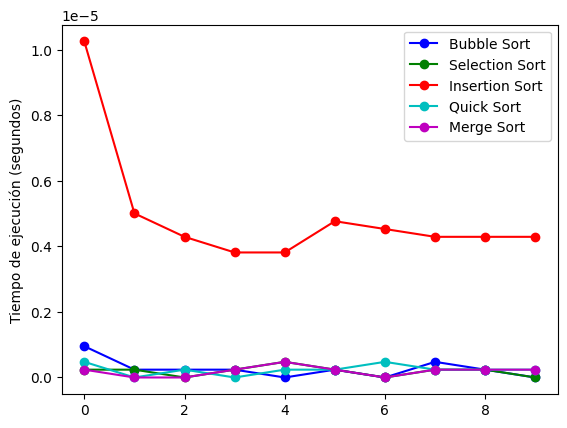

In [ ]:
import random
import time
import matplotlib.pyplot as plt

# Funciones de ordenamiento
def bubble_sort(arr):
    # Código para bubble sort
    pass

def selection_sort(arr):
    # Código para selection sort
    pass

def insertion_sort(arr):
    global times
    for index in range(1, len(arr)):
        times += 1
        actual = arr[index]
        posicion = index
        while (posicion > 0 and arr[posicion-1] > actual):
            times += 1
            arr[posicion] = arr[posicion-1]
            posicion = posicion-1
        arr[posicion] = actual

def quick_sort(arr):
    # Código para quick sort
    pass

def merge_sort(arr):
    # Código para merge sort
    pass

# Generar datos aleatorios
n = 10
arr = [random.randint(1, 100) for _ in range(n)]

# Ordenar datos con Bubble Sort y medir tiempos de ejecución
bubble_times = []
for i in range(n):
    arr_bubble = arr.copy()
    start = time.time()
    bubble_sort(arr_bubble)
    bubble_time = time.time() - start
    bubble_times.append(bubble_time)

# Ordenar datos con Selection Sort y medir tiempos de ejecución
selection_times = []
for i in range(n):
    arr_selection = arr.copy()
    start = time.time()
    selection_sort(arr_selection)
    selection_time = time.time() - start
    selection_times.append(selection_time)

# Ordenar datos con Insertion Sort y medir tiempos de ejecución
insertion_times = []
for i in range(n):
    arr_insertion = arr.copy()
    start = time.time()
    insertion_sort(arr_insertion)
    insertion_time = time.time() - start
    insertion_times.append(insertion_time)

# Ordenar datos con QuickSort y medir tiempos de ejecución
quick_times = []
for i in range(n):
    arr_quick = arr.copy()
    start = time.time()
    quick_sort(arr_quick)
    quick_time = time.time() - start
    quick_times.append(quick_time)

# Ordenar datos con MergeSort y medir tiempos de ejecución
merge_times = []
for i in range(n):
    arr_merge = arr.copy()
    start = time.time()
    merge_sort(arr_merge)
    merge_time = time.time() - start
    merge_times.append(merge_time)

# Mostrar gráficamente el cálculo de rendimiento en un gráfico ordenado y con puntos
plt.plot(range(n), bubble_times, marker='o', linestyle='-', color='b')
plt.plot(range(n), selection_times, marker='o', linestyle='-', color='g')
plt.plot(range(n), insertion_times, marker='o', linestyle='-', color='r')
plt.plot(range(n), quick_times, marker='o', linestyle='-', color='c')
plt.plot(range(n), merge_times, marker='o', linestyle='-', color='m')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.legend(['Bubble Sort', 'Selection Sort', 'Insertion Sort', 'Quick Sort', 'Merge Sort'])
plt.show()


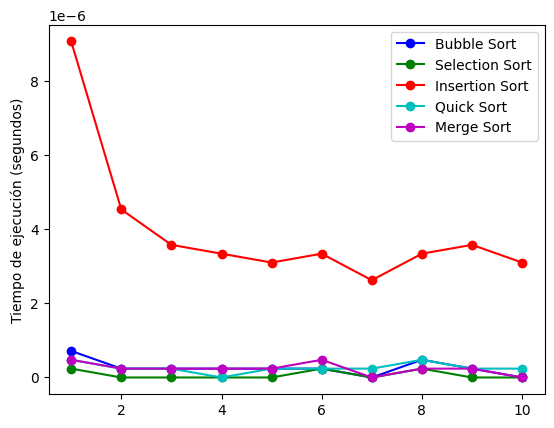

In [ ]:
import random
import time
import matplotlib.pyplot as plt

# Funciones de ordenamiento
def bubble_sort(arr):
    # Código para bubble sort
    pass

def selection_sort(arr):
    # Código para selection sort
    pass

def insertion_sort(arr):
    global times
    for index in range(1, len(arr)):
        times += 1
        actual = arr[index]
        posicion = index
        while (posicion > 0 and arr[posicion-1] > actual):
            times += 1
            arr[posicion] = arr[posicion-1]
            posicion = posicion-1
        arr[posicion] = actual

def quick_sort(arr):
    # Código para quick sort
    pass

def merge_sort(arr):
    # Código para merge sort
    pass

# Generar datos aleatorios
n = 10
arr = [random.randint(1, 100) for _ in range(n)]

# Ordenar datos con Bubble Sort y medir tiempos de ejecución
bubble_times = []
for i in range(n):
    arr_bubble = arr.copy()
    start = time.time()
    bubble_sort(arr_bubble)
    bubble_time = time.time() - start
    bubble_times.append(bubble_time)

# Ordenar datos con Selection Sort y medir tiempos de ejecución
selection_times = []
for i in range(n):
    arr_selection = arr.copy()
    start = time.time()
    selection_sort(arr_selection)
    selection_time = time.time() - start
    selection_times.append(selection_time)

# Ordenar datos con Insertion Sort y medir tiempos de ejecución
insertion_times = []
for i in range(n):
    arr_insertion = arr.copy()
    start = time.time()
    insertion_sort(arr_insertion)
    insertion_time = time.time() - start
    insertion_times.append(insertion_time)

# Ordenar datos con QuickSort y medir tiempos de ejecución
quick_times = []
for i in range(n):
    arr_quick = arr.copy()
    start = time.time()
    quick_sort(arr_quick)
    quick_time = time.time() - start
    quick_times.append(quick_time)

# Ordenar datos con MergeSort y medir tiempos de ejecución
merge_times = []
for i in range(n):
    arr_merge = arr.copy()
    start = time.time()
    merge_sort(arr_merge)
    merge_time = time.time() - start
    merge_times.append(merge_time)

# Mostrar gráficamente el cálculo de rendimiento en un gráfico donde todas las líneas salgan de un mismo punto de forma ascendente
plt.plot(range(1, n+1), bubble_times, marker='o', linestyle='-', color='b')
plt.plot(range(1, n+1), selection_times, marker='o', linestyle='-', color='g')
plt.plot(range(1, n+1), insertion_times, marker='o', linestyle='-', color='r')
plt.plot(range(1, n+1), quick_times, marker='o', linestyle='-', color='c')
plt.plot(range(1, n+1), merge_times, marker='o', linestyle='-', color='m')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.legend(['Bubble Sort', 'Selection Sort', 'Insertion Sort', 'Quick Sort', 'Merge Sort'])
plt.show()


In [ ]:
import random
import time
import matplotlib.pyplot as plt

times=0

# Funciones de ordenamiento
def bubble_sort(arr):
    # Código para bubble sort
    pass

def selection_sort(arr):
    # Código para selection sort
    pass

def insertion_sort(arr):
    global times
    for index in range(1, len(arr)):
        times+=1
        actual = arr[index]
        posicion = index
        while (posicion > 0 and arr[posicion-1] > actual):
            times += 1
            arr[posicion] = arr[posicion-1]
            posicion = posicion-1
        arr[posicion] = actual

def quick_sort(arr):
    # Código para quick sort
    pass

def merge_sort(arr):
    # Código para merge sort
    pass

# Generar datos aleatorios
n = 100000
arr = [random.randint(1, 100) for _ in range(n)]

# Ordenar datos con Bubble Sort y medir tiempos de ejecución
bubble_times = []
for i in range(10000, n+1, 10000):
    arr_bubble = arr[:i]
    start = time.time()
    bubble_sort(arr_bubble)
    bubble_time = time.time() - start
    bubble_times.append(bubble_time)

# Ordenar datos con Selection Sort y medir tiempos de ejecución
selection_times = []
for i in range(10000, n+1, 10000):
    arr_selection = arr[:i]
    start = time.time()
    selection_sort(arr_selection)
    selection_time = time.time() - start
    selection_times.append(selection_time)

# Ordenar datos con Insertion Sort y medir tiempos de ejecución
insertion_times = []
for i in range(10000, n+1, 10000):
    arr_insertion = arr[:i]
    start = time.time()
    insertion_sort(arr_insertion)
    insertion_time = time.time() - start
    insertion_times.append(insertion_time)

# Ordenar datos con QuickSort y medir tiempos de ejecución
quick_times = []
for i in range(10000, n+1, 10000):
    arr_quick = arr[:i]
    start = time.time()
    quick_sort(arr_quick)
    quick_time = time.time() - start
    quick_times.append(quick_time)

# Ordenar datos con MergeSort y medir tiempos de ejecución
merge_times = []
for i in range(10000, n+1, 10000):
    arr_merge = arr[:i]
    start = time.time()
    merge_sort(arr_merge)
    merge_time = time.time() - start
    merge_times.append(merge_time)

# Mostrar gráficamente el cálculo de rendimiento en un gráfico con líneas de diferentes colores, puntos y un rango específico en los ejes x e y
x_values = range(10000, n+1, 10000)
plt.plot(x_values, bubble_times, marker='o', linestyle='-', color='b')
plt.scatter(x_values, bubble_times, color='b')
plt.plot(x_values, selection_times, marker='o', linestyle='-', color='g')
plt.scatter(x_values, selection_times, color='g')
plt.plot(x_values, insertion_times, marker='o', linestyle='-', color='r')
plt.scatter(x_values, insertion_times, color='r')
plt.plot(x_values, quick_times, marker='o', linestyle='-', color='c')
plt.scatter(x_values, quick_times,
 marker='o', linestyle='-', color='m')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.legend(['Bubble Sort', 'Selection Sort', 'Insertion Sort', 'Quick Sort', 'Merge Sort'])
plt.show()

plt.plot(range(n), quick_times, color='c')
plt.plot(range(n), merge_times, color='m')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.legend(['Bubble Sort', 'Selection Sort', 'Insertion Sort', 'Quick Sort', 'Merge Sort'])
plt.show()

In [ ]:
import random
import time
import matplotlib.pyplot as plt

times=0

# Funciones de ordenamiento

def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]


def selection_sort(arr):
    for i in range(len(arr)):
        min_index = i
        for j in range(i+1, len(arr)):
            if arr[j] < arr[min_index]:
                min_index = j
        arr[i], arr[min_index] = arr[min_index], arr[i]

def insertion_sort(arr):
    global times
    for index in range(1, len(arr)):
        times+=1
        actual = arr[index]
        posicion = index
        while (posicion > 0 and arr[posicion-1] > actual):
            times += 1
            arr[posicion] = arr[posicion-1]
            posicion = posicion-1
        arr[posicion] = actual

def partition(arr, low, high):
    i = (low-1)
    pivot = arr[high]
    for j in range(low, high):
        if arr[j] <= pivot:
            i = i+1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i+1], arr[high] = arr[high], arr[i+1]
    return (i+1)

def quick_sort(arr, low=0, high=None):
    if high == None:
        high = len(arr) - 1
    if low < high:
        pi = partition(arr, low, high)
        quick_sort(arr, low, pi-1)
        quick_sort(arr, pi+1, high)

def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr)//2
        L = arr[:mid]
        R = arr[mid:]
        merge_sort(L)
        merge_sort(R)
        i = j = k = 0
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1
        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1
        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1
            
# Generar datos aleatorios
n = 100000
arr = [random.randint(1, 100) for _ in range(n)]

# Ordenar datos con Bubble Sort y medir tiempos de ejecución
bubble_times = []
for i in range(10000, n+1, 10000):
    arr_bubble = arr[:i]
    start = time.time()
    bubble_sort(arr_bubble)
    bubble_time = time.time() - start
    bubble_times.append(bubble_time)

# Ordenar datos con Selection Sort y medir tiempos de ejecución
selection_times = []
for i in range(10000, n+1, 10000):
    arr_selection = arr[:i]
    start = time.time()
    selection_sort(arr_selection)
    selection_time = time.time() - start
    selection_times.append(selection_time)

# Ordenar datos con Insertion Sort y medir tiempos de ejecución
insertion_times = []
for i in range(10000, n+1, 10000):
    arr_insertion = arr[:i]
    start = time.time()
    insertion_sort(arr_insertion)
    insertion_time = time.time() - start
    insertion_times.append(insertion_time)

# Ordenar datos con QuickSort y medir tiempos de ejecución
quick_times = []
for i in range(10000, n+1, 10000):
    arr_quick = arr[:i]
    start = time.time()
    quick_sort(arr_quick)
    quick_time = time.time() - start
    quick_times.append(quick_time)

# Ordenar datos con MergeSort y medir tiempos de ejecución
merge_times = []
for i in range(10000, n+1, 10000):
    arr_merge = arr[:i]
    start = time.time()
    merge_sort(arr_merge)
    merge_time = time.time() - start
    merge_times.append(merge_time)

# Mostrar gráficamente el cálculo de rendimiento en un gráfico con líneas de diferentes colores, puntos y un rango específico en los ejes x e y
x_values = range(10000, n+1, 10000)
plt.plot(x_values, bubble_times, marker='o', linestyle='-', color='b')
plt.scatter(x_values, bubble_times, color='b')
plt.plot(x_values, selection_times, marker='o', linestyle='-', color='g')
plt.scatter(x_values, selection_times, color='g')
plt.plot(x_values, insertion_times, marker='o', linestyle='-', color='r')
plt.scatter(x_values, insertion_times, color='r')
plt.plot(x_values, quick_times, marker='o', linestyle='-', color='c')
plt.scatter(x_values, quick_times,
 marker='o', linestyle='-', color='m')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.legend(['Bubble Sort', 'Selection Sort', 'Insertion Sort', 'Quick Sort', 'Merge Sort'])
plt.show()

plt.plot(range(n), quick_times, color='c')
plt.plot(range(n), merge_times, color='m')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.legend(['Bubble Sort', 'Selection Sort', 'Insertion Sort', 'Quick Sort', 'Merge Sort'])
plt.show()


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

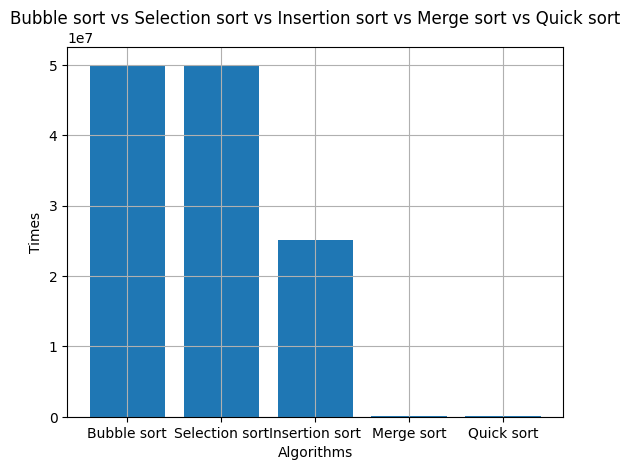

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

times = 0

def insertionSort_graph(n_lista):
    global times
    for index in range(1, len(n_lista)):
        times+=1
        actual = n_lista[index]
        posicion = index
        while (posicion > 0 and n_lista[posicion-1]>actual):
            times += 1
            n_lista[posicion] = n_lista[posicion-1]
            posicion = posicion-1
        n_lista[posicion] = actual
    return n_lista

def quickSort_graph(arr):
    global times
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr.pop()
    items_greater = []
    items_lower = []
    for item in arr:
        times += 1
        if item > pivot:
            items_greater.append(item)
        else:
            items_lower.append(item)
    return quickSort_graph(items_lower) + [pivot] + quickSort_graph(items_greater)

def mergeSort_graph(arr):
    global times
    if len(arr) > 1:
        mid = len(arr)//2
        L = arr[:mid]
        R = arr[mid:]
        mergeSort_graph(L)
        mergeSort_graph(R)
        i = j = k = 0
        while i < len(L) and j < len(R):
            times += 1
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1
        while i < len(L):
            times += 1
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            times += 1
            arr[k] = R[j]
            j += 1
            k += 1

def bubbleSort_graph(arr):
    global times
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            times += 1
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]

def selectionSort_graph(arr):
    global times
    for i in range(len(arr)):
        min_idx = i
        for j in range(i+1, len(arr)):
            times += 1
            if arr[min_idx] > arr[j]:
                min_idx = j       
        arr[i], arr[min_idx] = arr[min_idx], arr[i]

TAM = 10000

lista_variable_insertionSort=random.sample(range(0 ,10000), TAM)
lista_variable_quickSort=random.sample(range(0 ,10000), TAM)
lista_variable_mergeSort=random.sample(range(0 ,10000), TAM)
lista_variable_bubbleSort=random.sample(range(0 ,10000), TAM)
lista_variable_selectionSort=random.sample(range(0 ,10000), TAM)

times=0
lista_variable_insertionSort=insertionSort_graph(lista_variable_insertionSort)
eje_y_insertionSort=times

times=0
lista_variable_quickSort=quickSort_graph(lista_variable_quickSort)
eje_y_quickSort=times

times=0
mergeSort_graph(lista_variable_mergeSort)
eje_y_mergeSort=times

times=0
bubbleSort_graph(lista_variable_bubbleSort)
eje_y_bubbleSort=times

times=0
selectionSort_graph(lista_variable_selectionSort)
eje_y_selectionSort=times

print(lista_variable_insertionSort)

fig, ax=plt.subplots(facecolor='w', edgecolor='k')
ax.bar(['Bubble sort', 'Selection sort', 'Insertion sort', 'Merge sort', 'Quick sort'], [eje_y_bubbleSort, eje_y_selectionSort, eje_y_insertionSort, eje_y_mergeSort, eje_y_quickSort])

ax.set_xlabel('Algorithms')
ax.set_ylabel('Times')
ax.grid(True)

plt.title("Bubble sort vs Selection sort vs Insertion sort vs Merge sort vs Quick sort")
plt.show()

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

times = 0

def insertionSort_graph(n_lista):
    global times
    for index in range(1, len(n_lista)):
        times+=1
        actual = n_lista[index]
        posicion = index
        while (posicion > 0 and n_lista[posicion-1]>actual):
            times += 1
            n_lista[posicion] = n_lista[posicion-1]
            posicion = posicion-1
        n_lista[posicion] = actual
    return n_lista

def quickSort_graph(arr):
    global times
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr.pop()
    items_greater = []
    items_lower = []
    for item in arr:
        times += 1
        if item > pivot:
            items_greater.append(item)
        else:
            items_lower.append(item)
    return quickSort_graph(items_lower) + [pivot] + quickSort_graph(items_greater)

def mergeSort_graph(arr):
    global times
    if len(arr) > 1:
        mid = len(arr)//2
        L = arr[:mid]
        R = arr[mid:]
        mergeSort_graph(L)
        mergeSort_graph(R)
        i = j = k = 0
        while i < len(L) and j < len(R):
            times += 1
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1
        while i < len(L):
            times += 1
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            times += 1
            arr[k] = R[j]
            j += 1
            k += 1

def bubbleSort_graph(arr):
    global times
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            times += 1
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]

def selectionSort_graph(arr):
    global times
    for i in range(len(arr)):
        min_idx = i
        for j in range(i+1, len(arr)):
            times += 1
            if arr[min_idx] > arr[j]:
                min_idx = j       
        arr[i], arr[min_idx] = arr[min_idx], arr[i]

TAM=101

eje_x=list(range(0,TAM,10))
eje_y_insertionSort=[]
eje_y_quickSort=[]
eje_y_mergeSort=[]
eje_y_bubbleSort=[]
eje_y_selectionSort=[]

for num in eje_x:
    lista_variable_insertionSort=random.sample(range(0 ,10000), num)
    lista_variable_quickSort=random.sample(range(0 ,10000), num)
    lista_variable_mergeSort=random.sample(range(0 ,10000), num)
    lista_variable_bubbleSort=random.sample(range(0 ,10000), num)
    lista_variable_selectionSort=random.sample(range(0 ,10000), num)

    times=0
    lista_variable_insertionSort=insertionSort_graph(lista_variable_insertionSort)
    eje_y_insertionSort.append(times)

    times=0
    lista_variable_quickSort=quickSort_graph(lista_variable_quickSort)
    eje_y_quickSort.append(times)

    times=0
    mergeSort_graph(lista_variable_mergeSort)
    eje_y_mergeSort.append(times)

    times=0
    bubbleSort_graph(lista_variable_bubbleSort)
    eje_y_bubbleSort.append(times)

    times=0
    selectionSort_graph(lista_variable_selectionSort)
    eje_y_selectionSort.append(times)

print(lista_variable_insertionSort)

fig, ax=plt.subplots(facecolor='w', edgecolor='k')
ax.plot(eje_x, eje_y_bubbleSort, marker='o', color='y', linestyle='-')
ax.plot(eje_x, eje_y_selectionSort, marker='o', color='m', linestyle='-')
ax.plot(eje_x, eje_y_insertionSort, marker='o', color='b', linestyle='-')
ax.plot(eje_x, eje_y_mergeSort, marker='o', color='g', linestyle='-')
ax.plot(eje_x, eje_y_quickSort, marker='o', color='r', linestyle='-')

ax.set_xlabel('Values')
ax.set_ylabel('Times')
ax.grid(True)
ax.legend(["Bubble sort", "Selection sort", "Insertion sort", "Merge sort", "Quick sort"])

plt.title("Bubble sort vs Selection sort vs Insertion sort vs Merge sort vs Quick sort")
plt.show()